In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sstats
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
customers = pd.read_csv('customers.csv')
pd.options.display.max_columns = 30

In [3]:
customers

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0                  39                         5                       1   
1                  44                         6                       1   
2                  36                         4                       1   
3                  34                         3                       4   
4                  21                         5                       1   
...               ...                       ...                     ...   
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                          3       12691.0                  777   
1                          2        8256.0                  864   
2                          0        3418.0                    0   
3                          1        3313.0                 2517   
4                          0        4716.0                    0   
...                      ...           ...                  ...   
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...     

In [4]:
customers.drop(columns=["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2",
                       "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1"], 
               inplace=True)

In [5]:
customers

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0                  39                         5                       1   
1                  44                         6                       1   
2                  36                         4                       1   
3                  34                         3                       4   
4                  21                         5                       1   
...               ...                       ...                     ...   
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                          3       12691.0                  777   
1                          2        8256.0                  864   
2                          0        3418.0                    0   
3                          1        3313.0                 2517   
4                          0        4716.0                    0   
...                      ...           ...                  ...   
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...     

In [6]:
# customers[["Income_Category"]].value_counts()
# customers[["Customer_Age"]].value_counts()
customers[["Education_Level"]].value_counts()

Education_Level
Graduate           3128
High School        2013
Unknown            1519
Uneducated         1487
College            1013
Post-Graduate       516
Doctorate           451
dtype: int64

In [7]:
customers[["Marital_Status"]].value_counts()

Marital_Status
Married           4687
Single            3943
Unknown            749
Divorced           748
dtype: int64

In [8]:
customers[["Income_Category"]].value_counts()

Income_Category
Less than $40K     3561
$40K - $60K        1790
$80K - $120K       1535
$60K - $80K        1402
Unknown            1112
$120K +             727
dtype: int64

In [9]:
customers[["Card_Category"]].value_counts()

Card_Category
Blue             9436
Silver            555
Gold              116
Platinum           20
dtype: int64

In [10]:
for column in customers.columns:
    print(customers[[column]].isna().sum(), "\n")

CLIENTNUM    0
dtype: int64 

Attrition_Flag    0
dtype: int64 

Customer_Age    0
dtype: int64 

Gender    0
dtype: int64 

Dependent_count    0
dtype: int64 

Education_Level    0
dtype: int64 

Marital_Status    0
dtype: int64 

Income_Category    0
dtype: int64 

Card_Category    0
dtype: int64 

Months_on_book    0
dtype: int64 

Total_Relationship_Count    0
dtype: int64 

Months_Inactive_12_mon    0
dtype: int64 

Contacts_Count_12_mon    0
dtype: int64 

Credit_Limit    0
dtype: int64 

Total_Revolving_Bal    0
dtype: int64 

Avg_Open_To_Buy    0
dtype: int64 

Total_Amt_Chng_Q4_Q1    0
dtype: int64 

Total_Trans_Amt    0
dtype: int64 

Total_Trans_Ct    0
dtype: int64 

Total_Ct_Chng_Q4_Q1    0
dtype: int64 

Avg_Utilization_Ratio    0
dtype: int64 



In [11]:
data = customers.copy()
data["Target"] = (customers["Attrition_Flag"] == "Attrited Customer").astype(np.int8)
data.drop(columns="Attrition_Flag", inplace=True)
data["Flag_Male"] = (customers["Gender"] == "M").astype(np.int8)
data.drop(columns="Gender", inplace=True)
# data["Income_Category"] = data["Income_Category"].replace(["Less than $40K", 
#                                                            "$40K - $60K",
#                                                            "$60K - $80K",
#                                                            "$80K - $120K",
#                                                            "$120K +",
#                                                            "Unknown"],
#                                                           [20,50,70,100,140,None])
data["Card_Category"] = data["Card_Category"].replace(["Blue", 
                                                       "Silver",
                                                       "Gold",
                                                       "Platinum"],
                                                      [0,1,2,3])

# Handling missing data

In [12]:
data

CLIENTNUM  Customer_Age  Dependent_count Education_Level  \
0      768805383            45                3     High School   
1      818770008            49                5        Graduate   
2      713982108            51                3        Graduate   
3      769911858            40                4     High School   
4      709106358            40                3      Uneducated   
...          ...           ...              ...             ...   
10122  772366833            50                2        Graduate   
10123  710638233            41                2         Unknown   
10124  716506083            44                1     High School   
10125  717406983            30                2        Graduate   
10126  714337233            43                2        Graduate   

      Marital_Status Income_Category  Card_Category  Months_on_book  \
0            Married     $60K - $80K              0              39   
1             Single  Less than $40K              0              44   
2            Married    $80K - $120K              0              36   
3            Unknown  Less than $40K              0              34   
4            Married     $60K - $80K              0              21   
...              ...             ...            ...             ...   
10122         Single     $40K - $60K              0              40   
10123       Divorced     $40K - $60K              0              25   
10124        Married  Less than $40K              0              36   
10125        Unknown     $40K - $60K              0              36   
10126        Married  Less than $40K              1              25   

       Total_Relationship_Count  Months_Inactive_12_mon  \
0                             5                       1   
1                             6                       1   
2                             4                       1   
3                             3                       4   
4                             5                       1   
...                         ...                     ...   
10122                         3                       2   
10123                         4                       2   
10124                         5                       3   
10125                         4                       3   
10126                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                          3       12691.0                  777   
1                          2        8256.0                  864   
2                          0        3418.0                    0   
3                          1        3313.0                 2517   
4                          0        4716.0                    0   
...                      ...           ...                  ...   
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0   

In [13]:
def KNNFillerMissingData(data):
    cols = ["Education_Level", "Marital_Status", "Income_Category"]
    fitted_KNeighborsClassifiers = []
    data_knn = data.copy()
    for column_name in cols:
        X_train = data[data[column_name] != "Unknown"]
        X_train = X_train.drop(columns=cols)
        X_train = X_train.drop(columns=["CLIENTNUM"])
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)

        y_train = data[data[column_name] != "Unknown"][column_name]

        X_test = data[data[column_name] == "Unknown"]
        X_test = X_test.drop(columns=cols)
        X_test = X_test.drop(columns=["CLIENTNUM"])
        scaler = StandardScaler()
        X_test = scaler.fit_transform(X_test)

        model = KNeighborsClassifier(n_neighbors=5)
        model.fit(X_train, y_train)
        fitted_KNeighborsClassifiers.append(model)
        y_preds = model.predict(X_test)

        data_knn.loc[data_knn[column_name] == "Unknown", column_name] = y_preds
    data_knn.drop_duplicates(inplace=True)
    return data_knn, fitted_KNeighborsClassifiers

In [14]:
KNNFillerMissingData(data)[0]

CLIENTNUM  Customer_Age  Dependent_count Education_Level  \
0      768805383            45                3     High School   
1      818770008            49                5        Graduate   
2      713982108            51                3        Graduate   
3      769911858            40                4     High School   
4      709106358            40                3      Uneducated   
...          ...           ...              ...             ...   
10122  772366833            50                2        Graduate   
10123  710638233            41                2        Graduate   
10124  716506083            44                1     High School   
10125  717406983            30                2        Graduate   
10126  714337233            43                2        Graduate   

      Marital_Status Income_Category  Card_Category  Months_on_book  \
0            Married     $60K - $80K              0              39   
1             Single  Less than $40K              0              44   
2            Married    $80K - $120K              0              36   
3            Married  Less than $40K              0              34   
4            Married     $60K - $80K              0              21   
...              ...             ...            ...             ...   
10122         Single     $40K - $60K              0              40   
10123       Divorced     $40K - $60K              0              25   
10124        Married  Less than $40K              0              36   
10125         Single     $40K - $60K              0              36   
10126        Married  Less than $40K              1              25   

       Total_Relationship_Count  Months_Inactive_12_mon  \
0                             5                       1   
1                             6                       1   
2                             4                       1   
3                             3                       4   
4                             5                       1   
...                         ...                     ...   
10122                         3                       2   
10123                         4                       2   
10124                         5                       3   
10125                         4                       3   
10126                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                          3       12691.0                  777   
1                          2        8256.0                  864   
2                          0        3418.0                    0   
3                          1        3313.0                 2517   
4                          0        4716.0                    0   
...                      ...           ...                  ...   
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0   

# Exploratory data analysis

In [15]:
data

CLIENTNUM  Customer_Age  Dependent_count Education_Level  \
0      768805383            45                3     High School   
1      818770008            49                5        Graduate   
2      713982108            51                3        Graduate   
3      769911858            40                4     High School   
4      709106358            40                3      Uneducated   
...          ...           ...              ...             ...   
10122  772366833            50                2        Graduate   
10123  710638233            41                2         Unknown   
10124  716506083            44                1     High School   
10125  717406983            30                2        Graduate   
10126  714337233            43                2        Graduate   

      Marital_Status Income_Category  Card_Category  Months_on_book  \
0            Married     $60K - $80K              0              39   
1             Single  Less than $40K              0              44   
2            Married    $80K - $120K              0              36   
3            Unknown  Less than $40K              0              34   
4            Married     $60K - $80K              0              21   
...              ...             ...            ...             ...   
10122         Single     $40K - $60K              0              40   
10123       Divorced     $40K - $60K              0              25   
10124        Married  Less than $40K              0              36   
10125        Unknown     $40K - $60K              0              36   
10126        Married  Less than $40K              1              25   

       Total_Relationship_Count  Months_Inactive_12_mon  \
0                             5                       1   
1                             6                       1   
2                             4                       1   
3                             3                       4   
4                             5                       1   
...                         ...                     ...   
10122                         3                       2   
10123                         4                       2   
10124                         5                       3   
10125                         4                       3   
10126                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                          3       12691.0                  777   
1                          2        8256.0                  864   
2                          0        3418.0                    0   
3                          1        3313.0                 2517   
4                          0        4716.0                    0   
...                      ...           ...                  ...   
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0   

In [16]:
customers

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0                  39                         5                       1   
1                  44                         6                       1   
2                  36                         4                       1   
3                  34                         3                       4   
4                  21                         5                       1   
...               ...                       ...                     ...   
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                          3       12691.0                  777   
1                          2        8256.0                  864   
2                          0        3418.0                    0   
3                          1        3313.0                 2517   
4                          0        4716.0                    0   
...                      ...           ...                  ...   
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...     

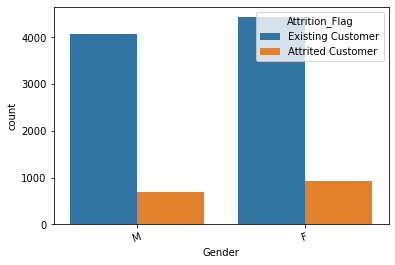

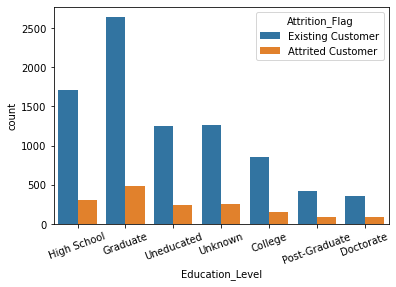

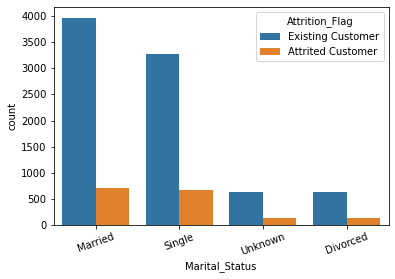

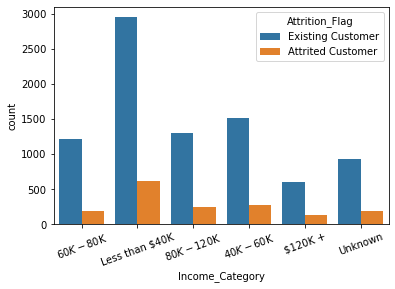

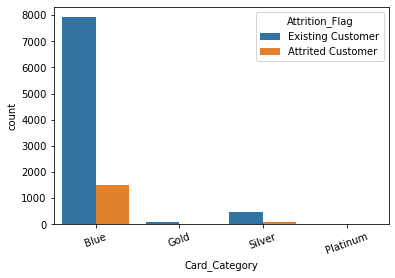

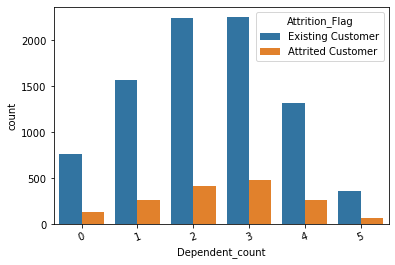

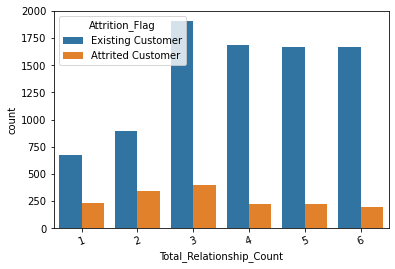

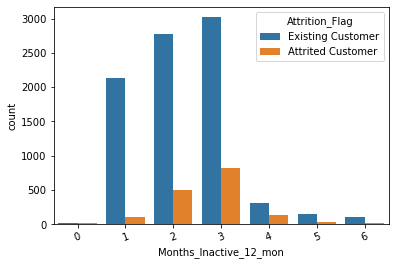

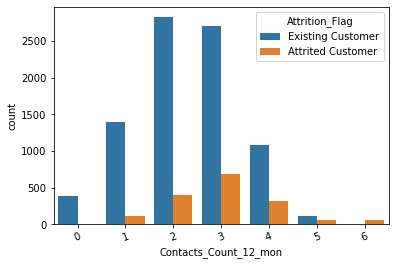

In [14]:
for x in ["Gender", "Education_Level", "Marital_Status", "Income_Category", "Card_Category", "Dependent_count",
         "Total_Relationship_Count", "Months_Inactive_12_mon", "Contacts_Count_12_mon"]:
    g = sns.countplot(x=x, data=customers, hue="Attrition_Flag")
    plt.xticks(rotation=20)
    plt.show()

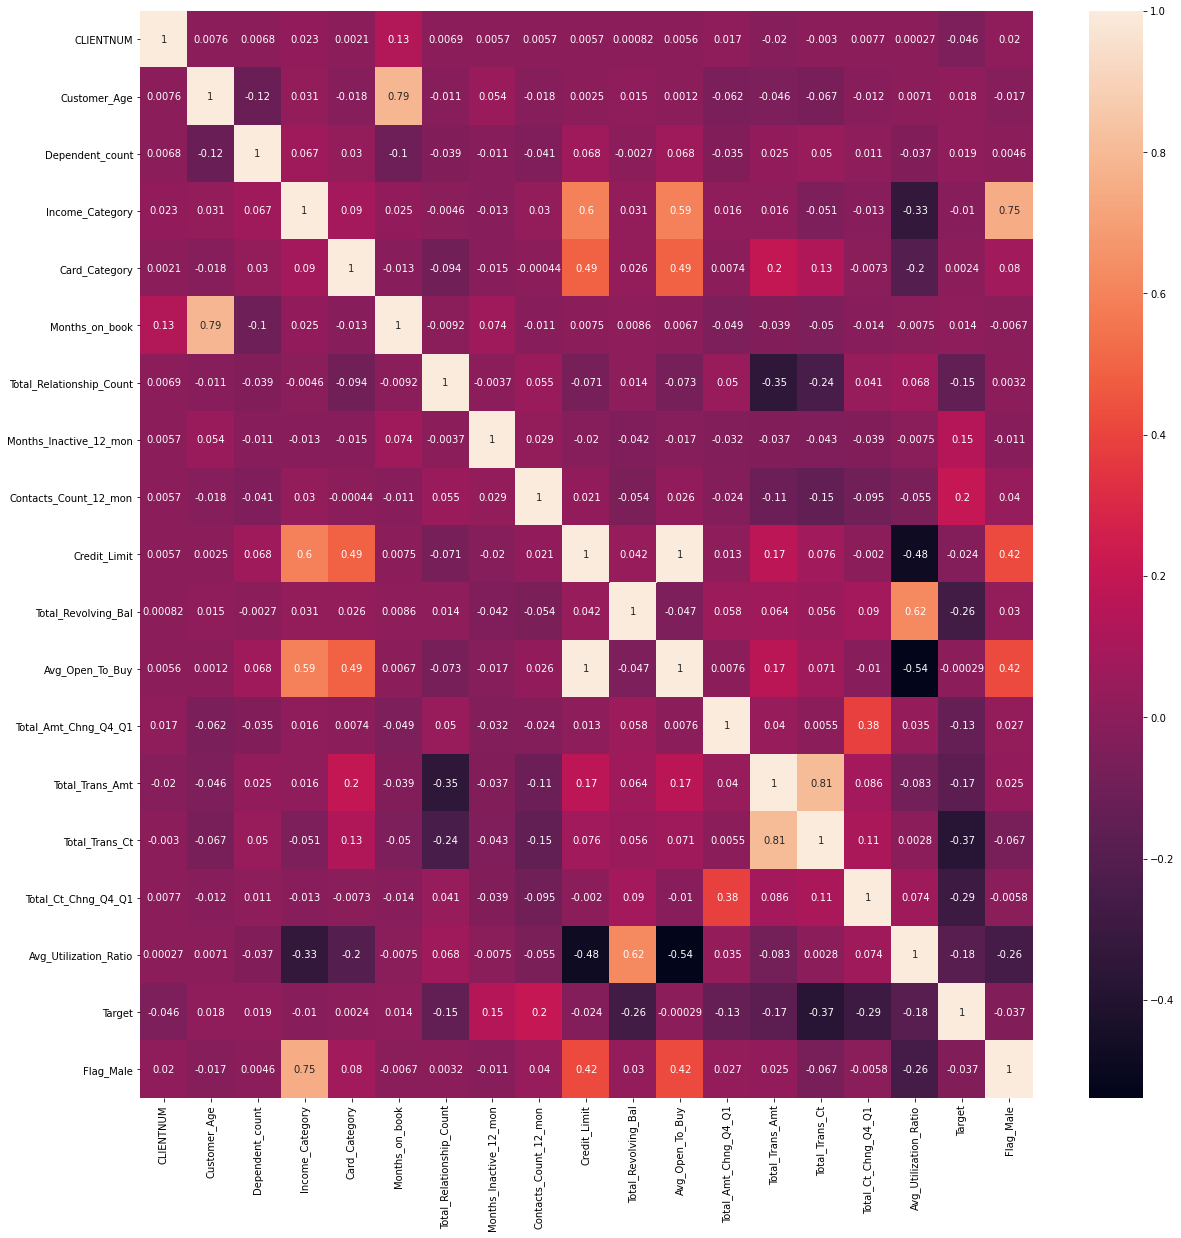

In [71]:
corrMatrix = data.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corrMatrix, annot=True)
plt.show()

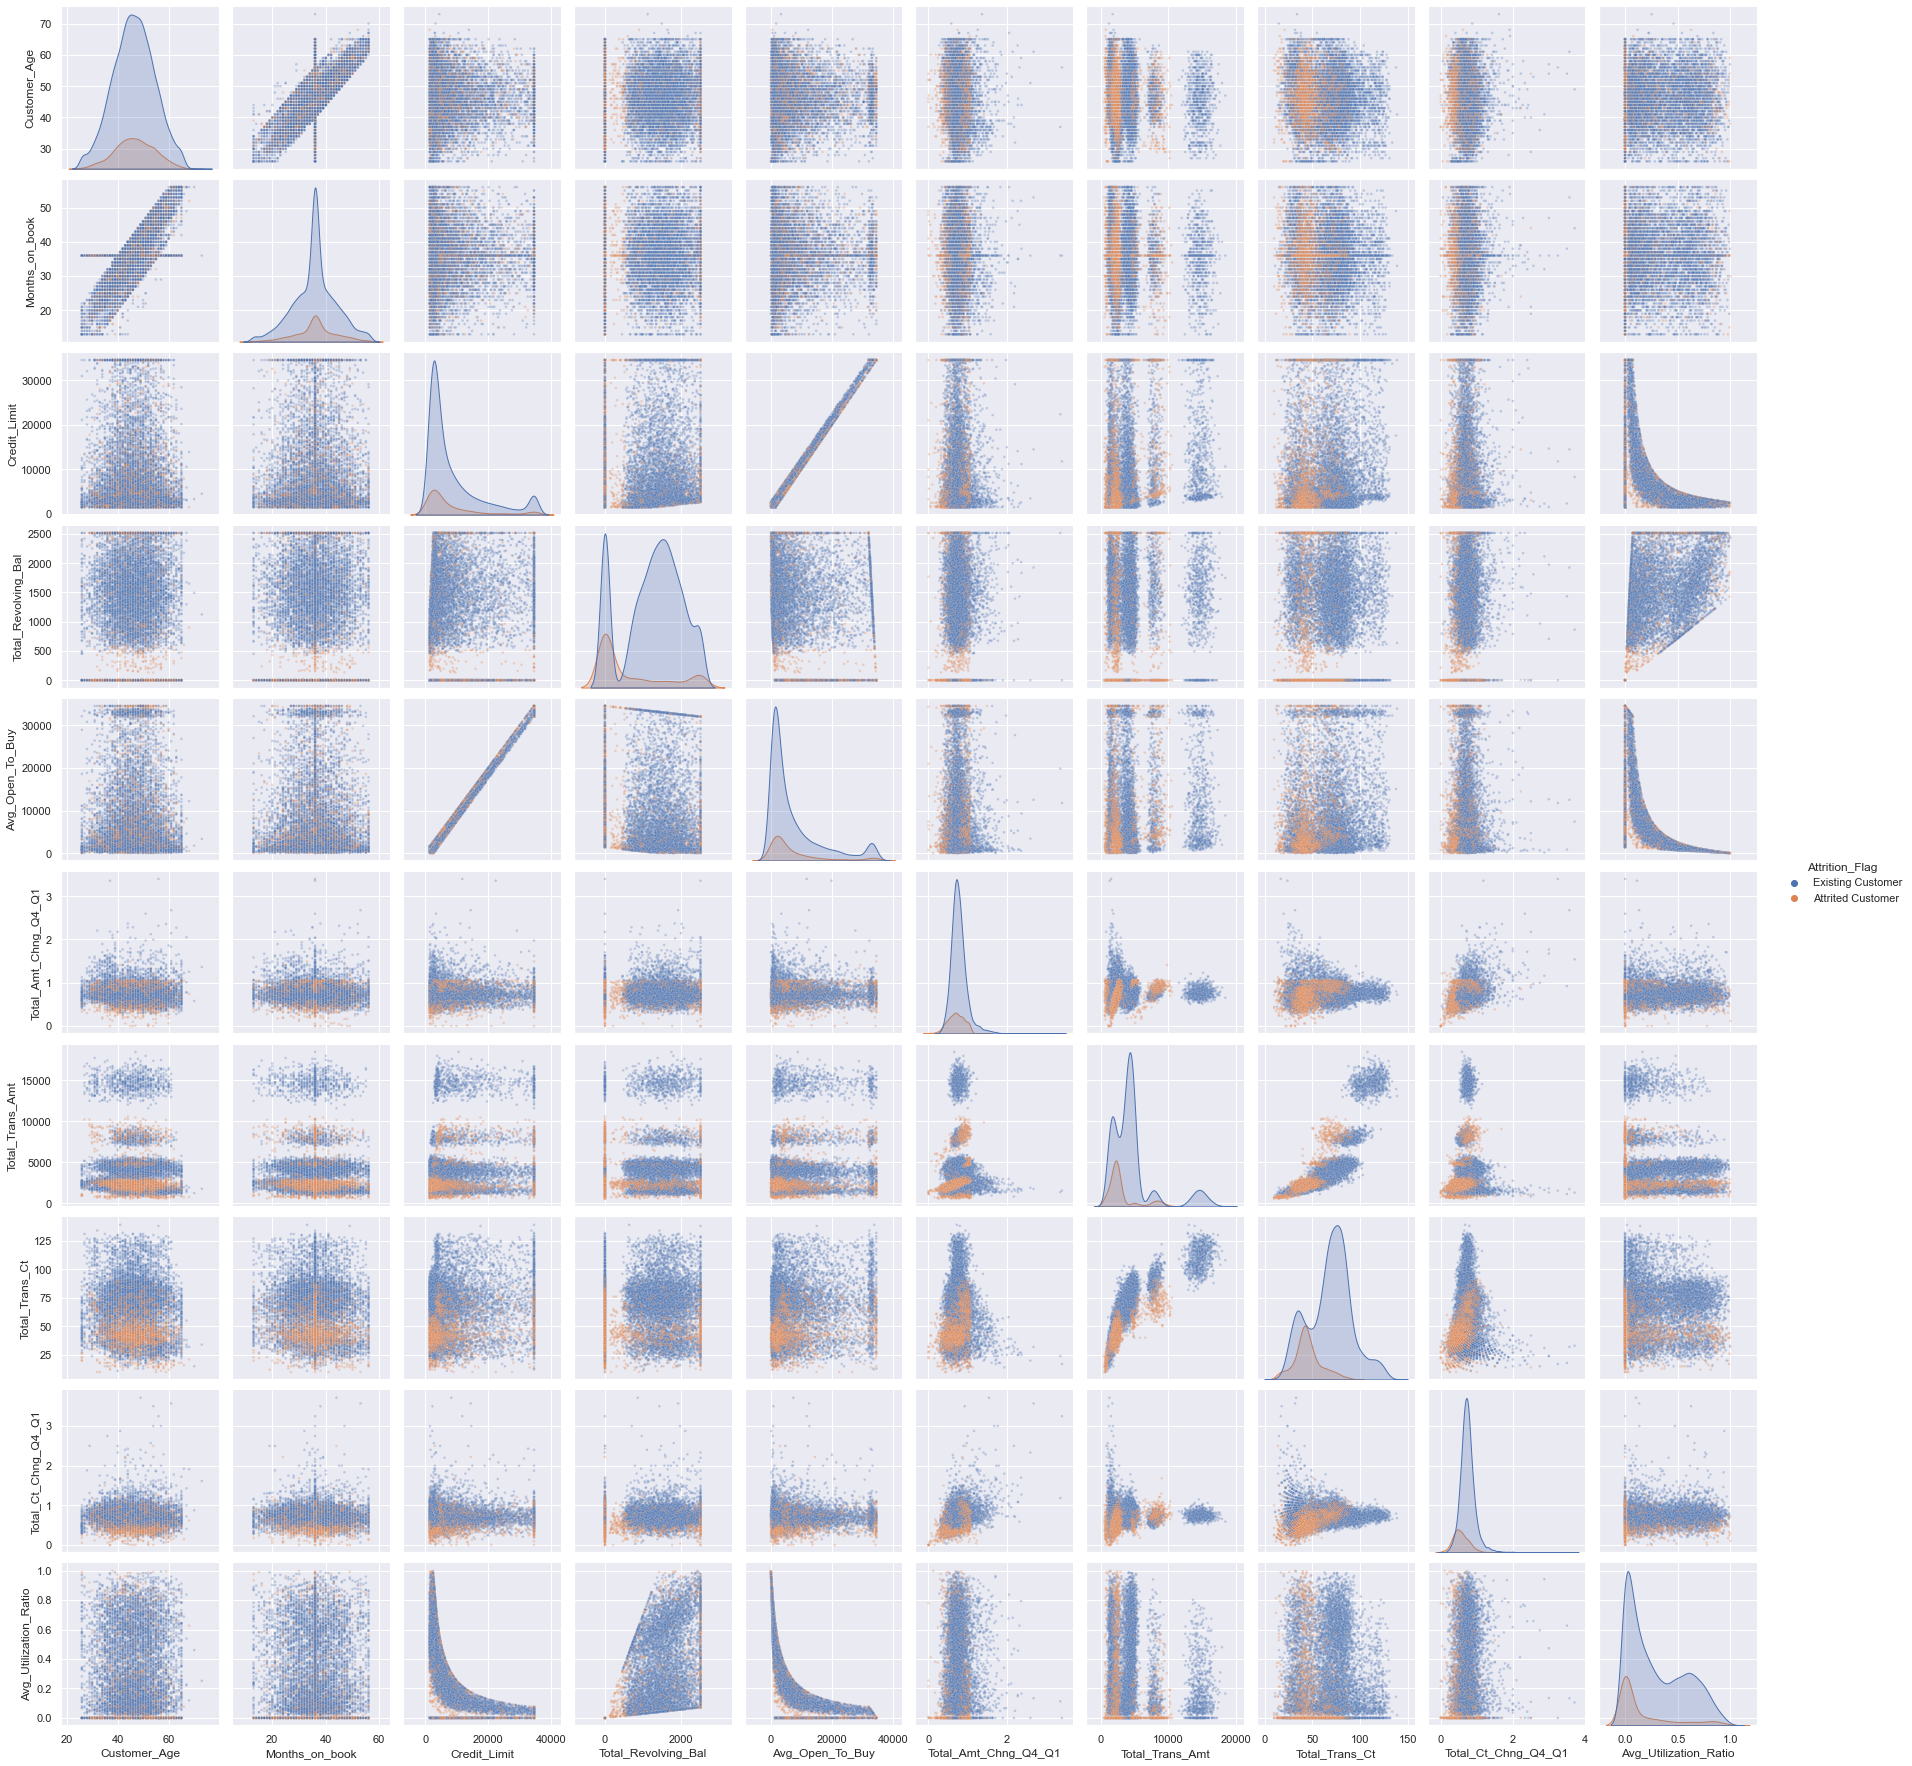

In [26]:
# plt.figure(figsize=(50, 50))
sns.set(rc={'figure.figsize':(100,100)})
g = sns.pairplot(customers[["Customer_Age", "Months_on_book", "Credit_Limit", "Total_Revolving_Bal", "Avg_Open_To_Buy",
             "Total_Amt_Chng_Q4_Q1", "Total_Trans_Amt", "Total_Trans_Ct", "Total_Ct_Chng_Q4_Q1", 
             "Avg_Utilization_Ratio", "Attrition_Flag"]], hue="Attrition_Flag", 
             plot_kws={'alpha':0.3, "s":7})
# g.fig.set_size_inches(100, 100)
plt.show()

### Relationships

Total_Revolving_Bal	~ Customer_Age

Total_Trans_Amt ~ Customer_Age

Total_Trans_Ct ~ Customer_Age

Total_Ct_Chng_Q4_Q1 ~ Customer_Age

----------------------------------
Total_Revolving_Balance ~ Month_on_book

Total_Trans_Amt ~ Month_on_book

----------------------------------
Total_Trans_Amt ~ Credit_limit

----------------------------------
Total_Reolving_Bal ~ Total_Revolving_Bal

Avg_Open_To_Buy ~ ~ Total_Revolving_Bal

Total_Trans_Amt ~ Total_Revolving_Bal

Total_Trans_Ct ~ Total_Revolving_Bal

----------------------------------
Total_Revolving_Bal ~ Avg_Open_To_Buy

Total_Trans_Amt ~ Avg_Open_To_Buy

total_Trans_Ct ~ Avg_Open_To_Buy

----------------------------------
Total_Revolving_Bal ~ Total_Amt_Chng_Q4_Q1

Total_Trans_Amt ~ Total_Amt_Chng_Q4_Q1 WAŻNE

Total_Trans_Ct ~ Total_Amt_Chng_Q4_Q1

Total_Ct_Chng_Q4_Q1 ~ Total_Amt_Chng_Q4_Q1

----------------------------------
WSZYSTKO ~ Total_Trans_Amt

----------------------------------
WSZYSTKO ~ Total_Trans_Ct

----------------------------------
Customer_Age ~ Total_Ct_Chng_Q4_Q1

Month_On_Book ~ Total_Ct_Chng_Q4_Q1

Total_Revolving_Bal ~ Total_Ct_Chng_Q4_Q1

Total_Amt_Chng_Q4_Q1 ~ Total_Ct_Chng_Q4_Q1

Total_Trans_Amt ~ Total_Ct_Chng_Q4_Q1

Total_Trans_Ct ~ Total_Ct_Chng_Q4_Q1

Total_Ct_Chng_Q4_Q1 ~ Total_Ct_Chng_Q4_Q1

----------------------------------
Total_Revolving_Bal ~ Avg_Utilization_Ratio

Total_Trans_Amt ~ Avg_Utilization_Ratio

Total_Trans_Ct ~ Avg_Utilization_Ratio

# Testing models

## Classification models for 2d spaces

### Most promising variables found in EDA: Total_Trans_Amt and Total_Amt_Chng_Q4_Q1

#### Decision tree

0.775804017921665 0.8787519747235387


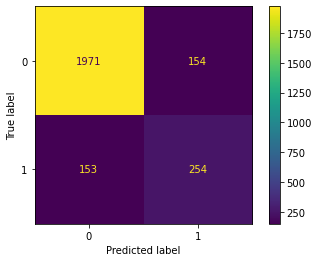

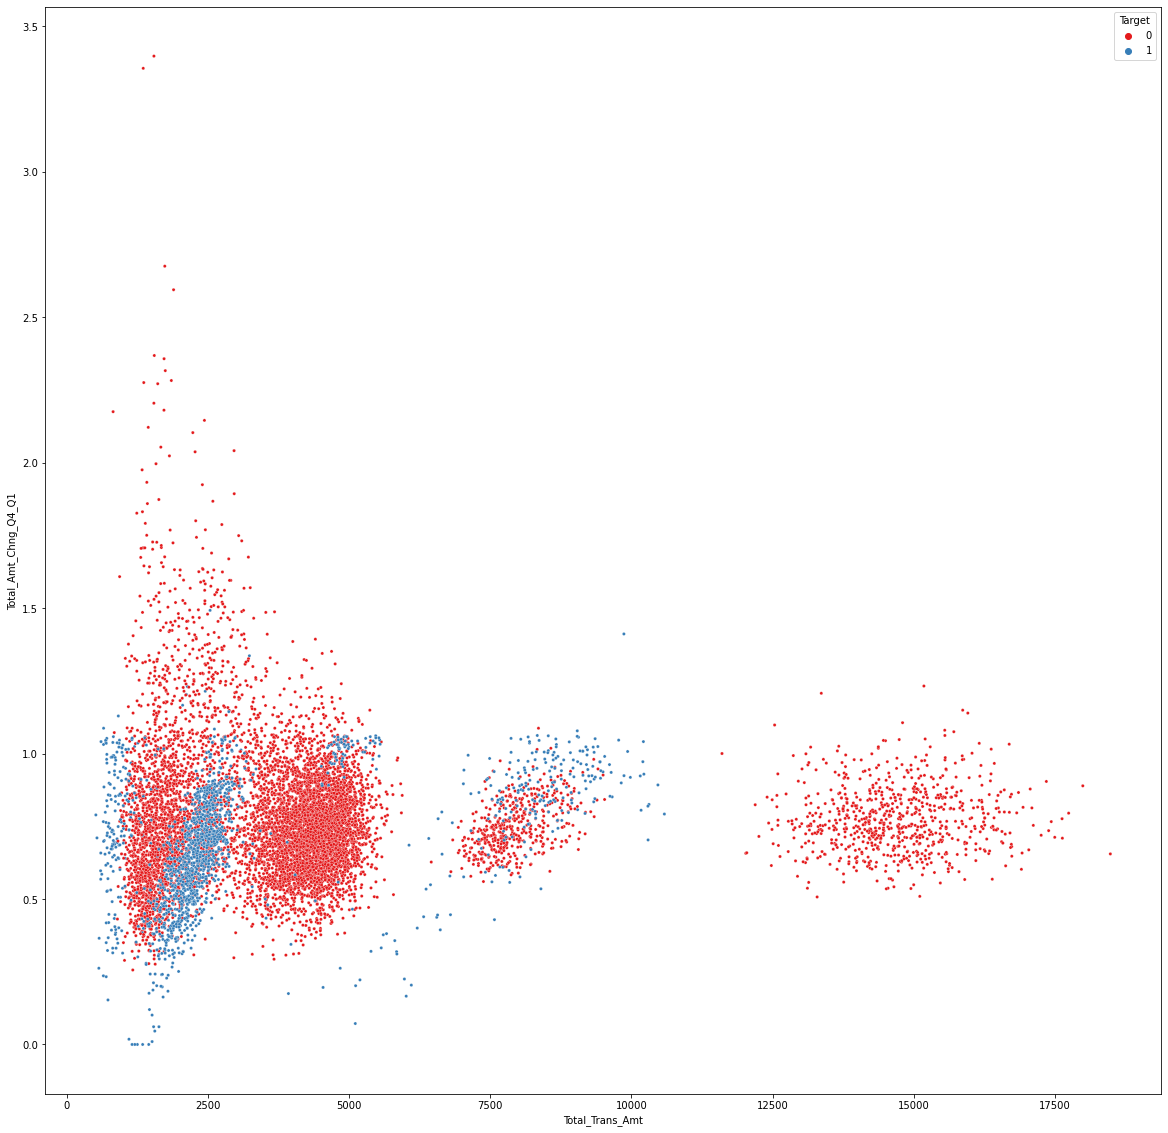

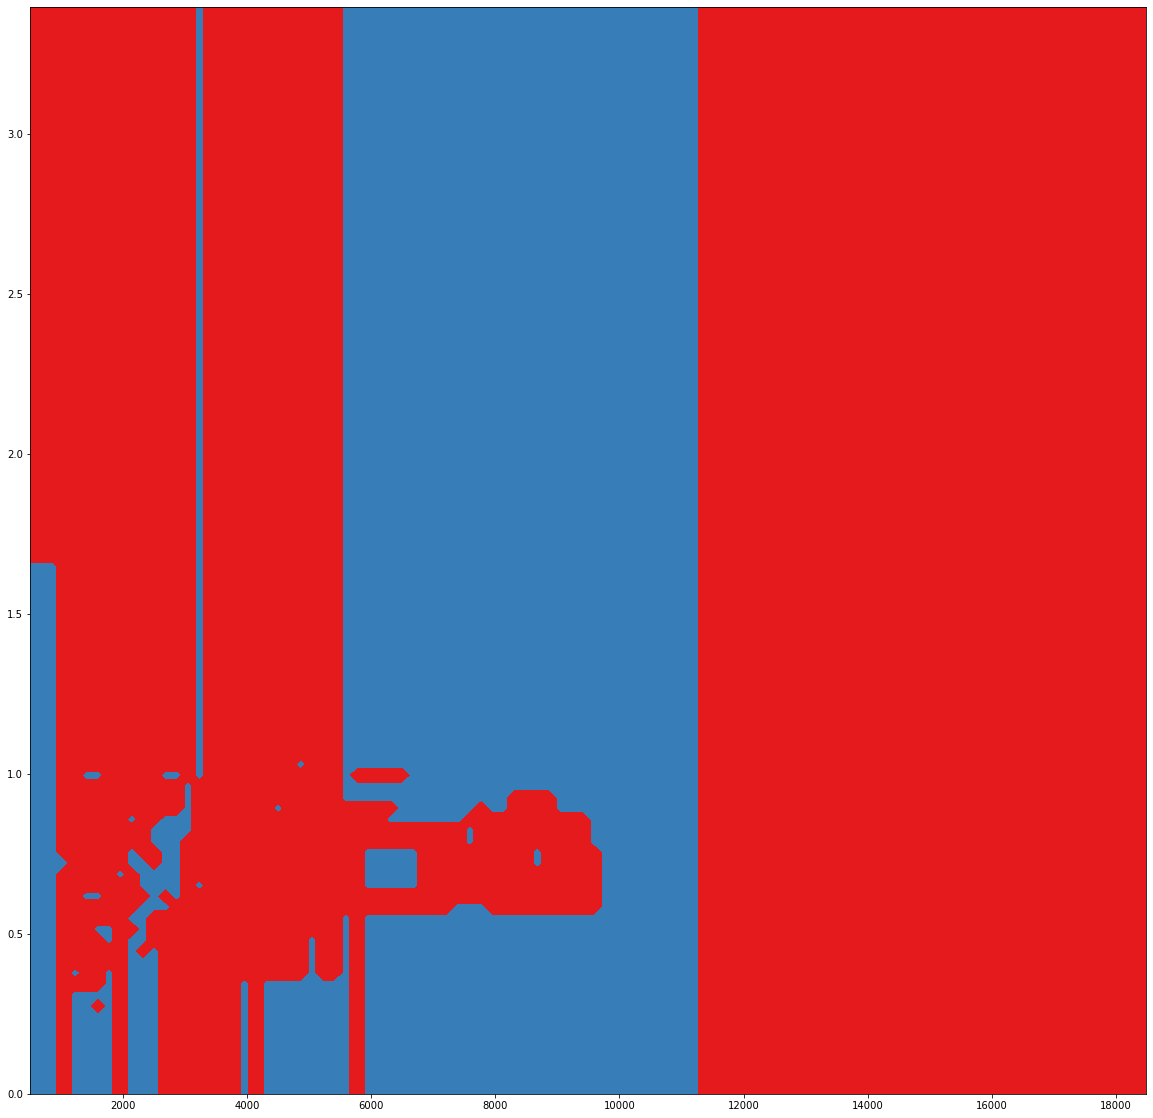

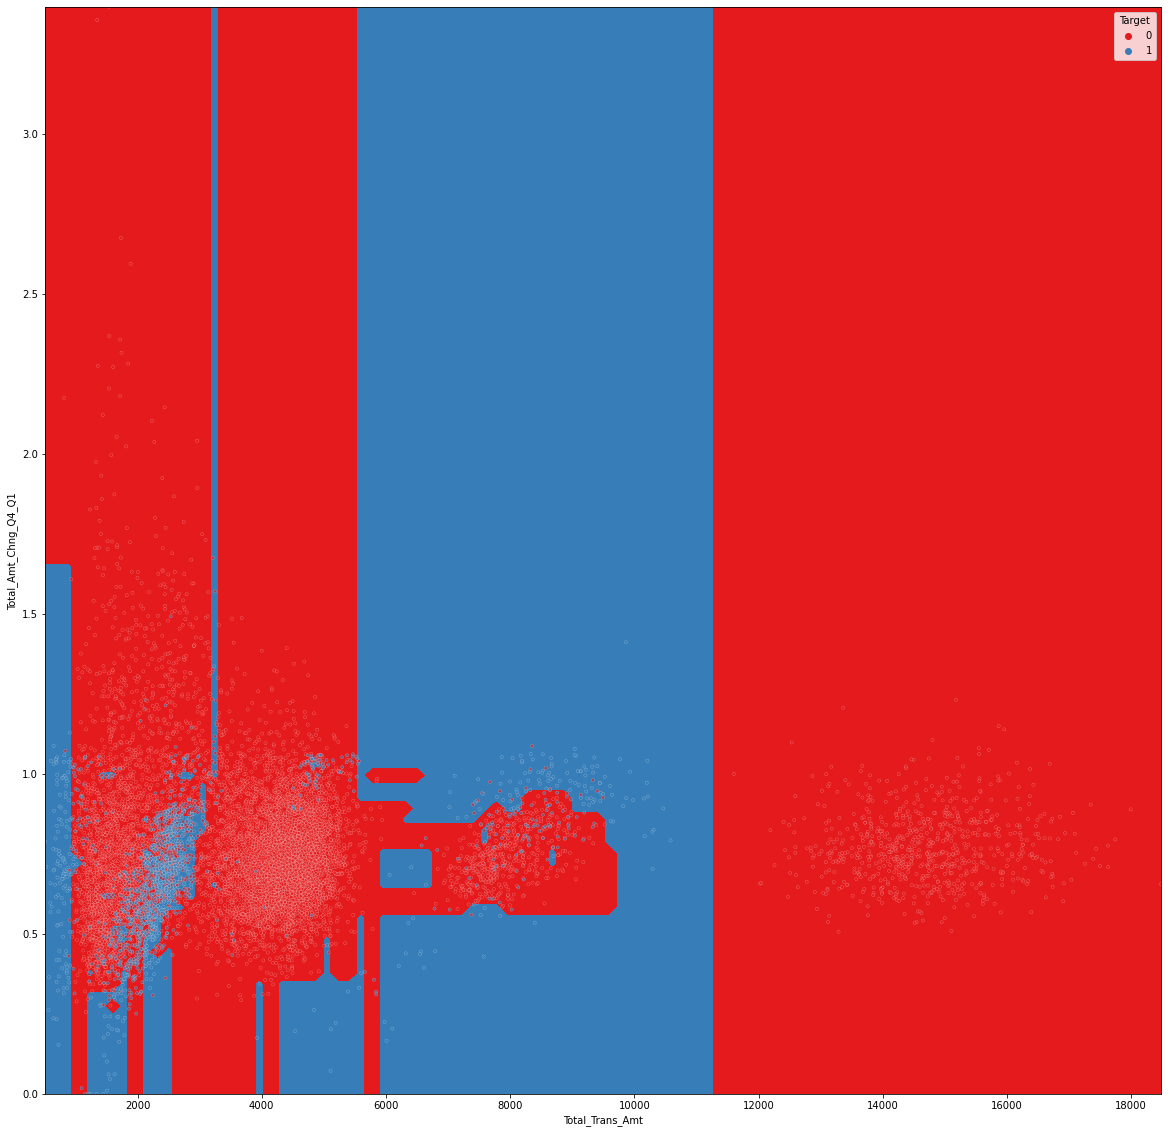

In [26]:
mesh_x, mesh_y = np.meshgrid(
    np.linspace(data.Total_Trans_Amt.min(), data.Total_Trans_Amt.max(), 100),
    np.linspace(data.Total_Amt_Chng_Q4_Q1.min(), data.Total_Amt_Chng_Q4_Q1.max(), 100),
)

mesh_data = np.hstack([mesh_x.reshape(-1, 1), mesh_y.reshape(-1, 1)])
mesh_data = pd.DataFrame(mesh_data, columns=["Total_Trans_Amt", "Total_Amt_Chng_Q4_Q1"])
# print(mesh_data)
preds = np.empty((len(mesh_data),))

X_train, X_test, y_train, y_test = train_test_split(data[["Total_Trans_Amt", "Total_Amt_Chng_Q4_Q1"]], 
                                                    data["Target"], stratify=data["Target"])
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
data_tree = tree.DecisionTreeClassifier()
data_tree.fit(X_resampled, y_resampled)
mesh_data_pred = data_tree.predict(mesh_data)
# for i, (_, r) in enumerate(mesh_data.iterrows()):
#     preds[i] = data_tree.all_targets.index(iris2d_tree.classify(r))


y_pred = data_tree.predict(X_test)
print(balanced_accuracy_score(y_test, y_pred), data_tree.score(X_test, y_test))
plot_confusion_matrix(data_tree, X_test, y_test)
plt.figure(figsize=(20, 20))
sns.scatterplot(
    x="Total_Trans_Amt", y="Total_Amt_Chng_Q4_Q1", hue="Target", data=data, palette="Set1", s=10, alpha=1.0
)
plt.show()
plt.figure(figsize=(20, 20))
plt.contourf(
    mesh_x, mesh_y, mesh_data_pred.reshape(mesh_x.shape), cmap="Set1", vmin=0, vmax=7
)
plt.show()
plt.figure(figsize=(20, 20))
plt.contourf(
    mesh_x, mesh_y, mesh_data_pred.reshape(mesh_x.shape), cmap="Set1", vmin=0, vmax=7
)
sns.scatterplot(
    x="Total_Trans_Amt", y="Total_Amt_Chng_Q4_Q1", hue="Target", data=data, palette="Set1", s=10, alpha=0.6
)
plt.show()

#### AdaBoost

0.8482243098713687 0.8436018957345972


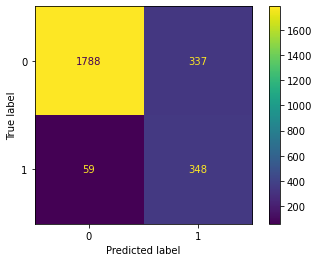

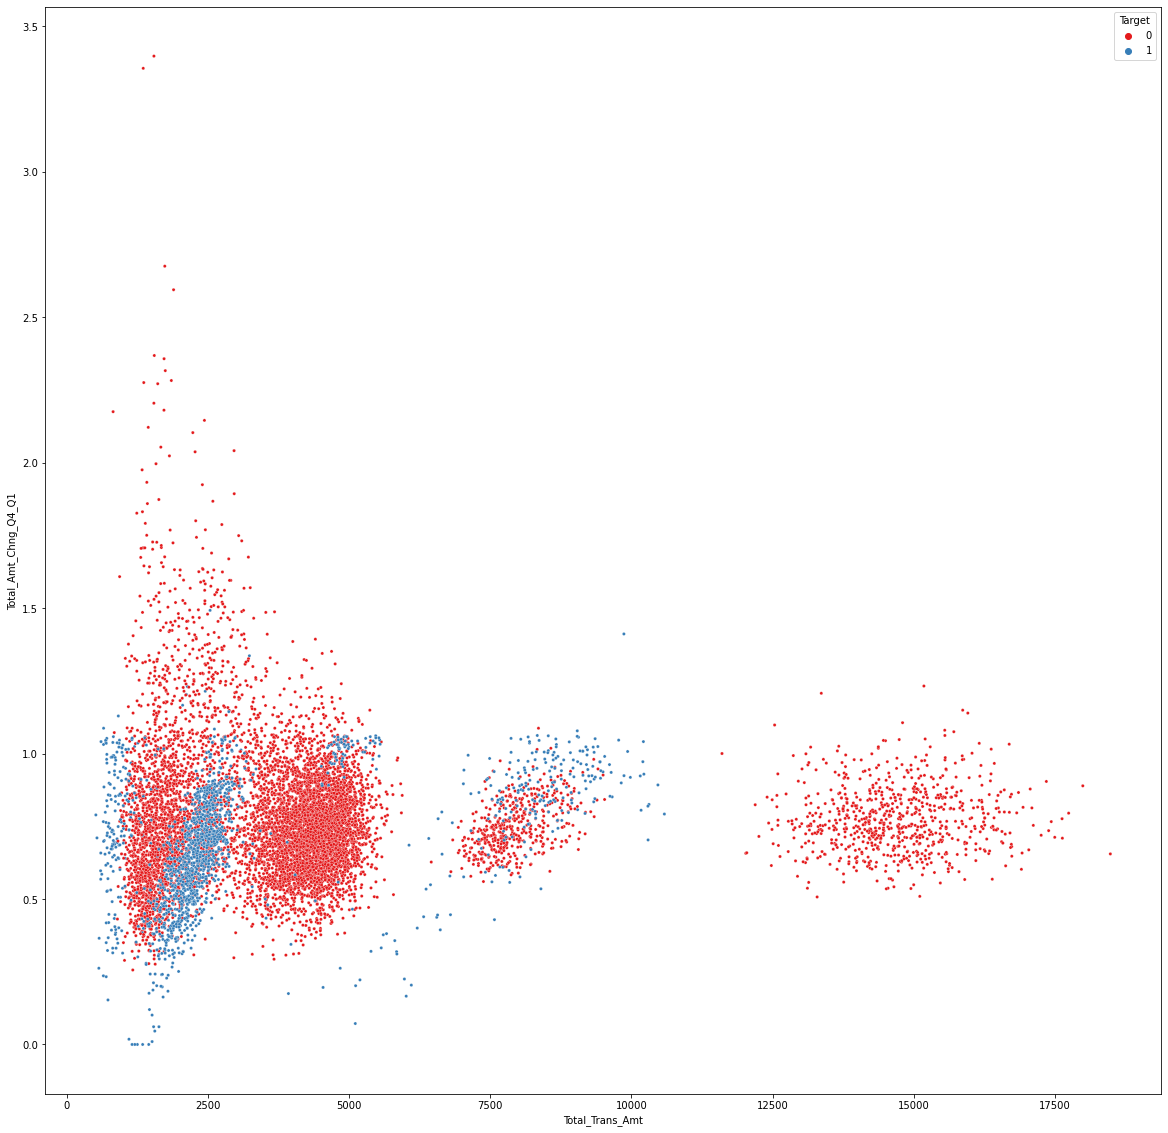

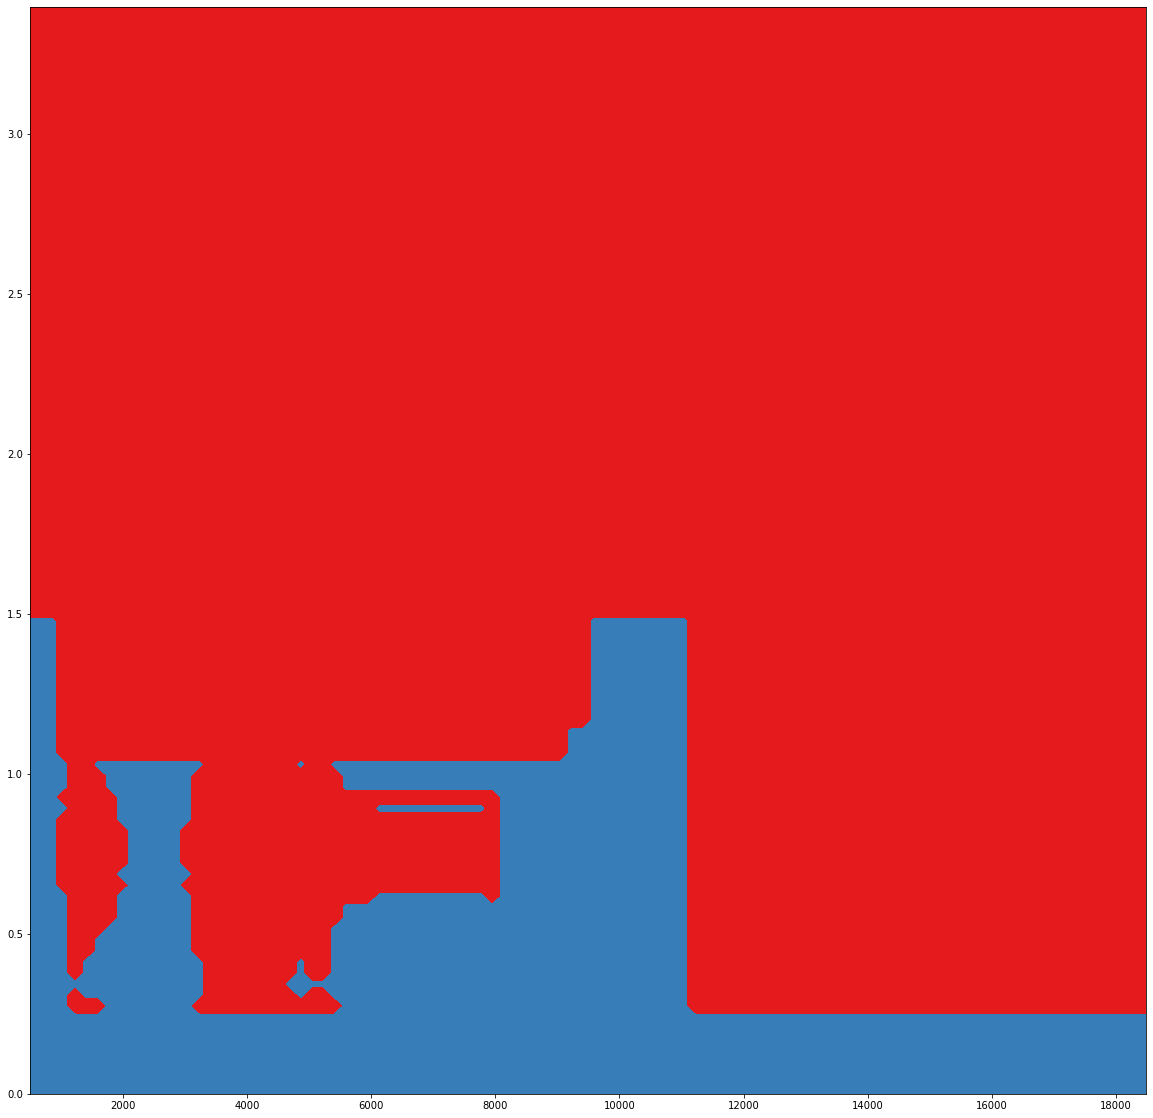

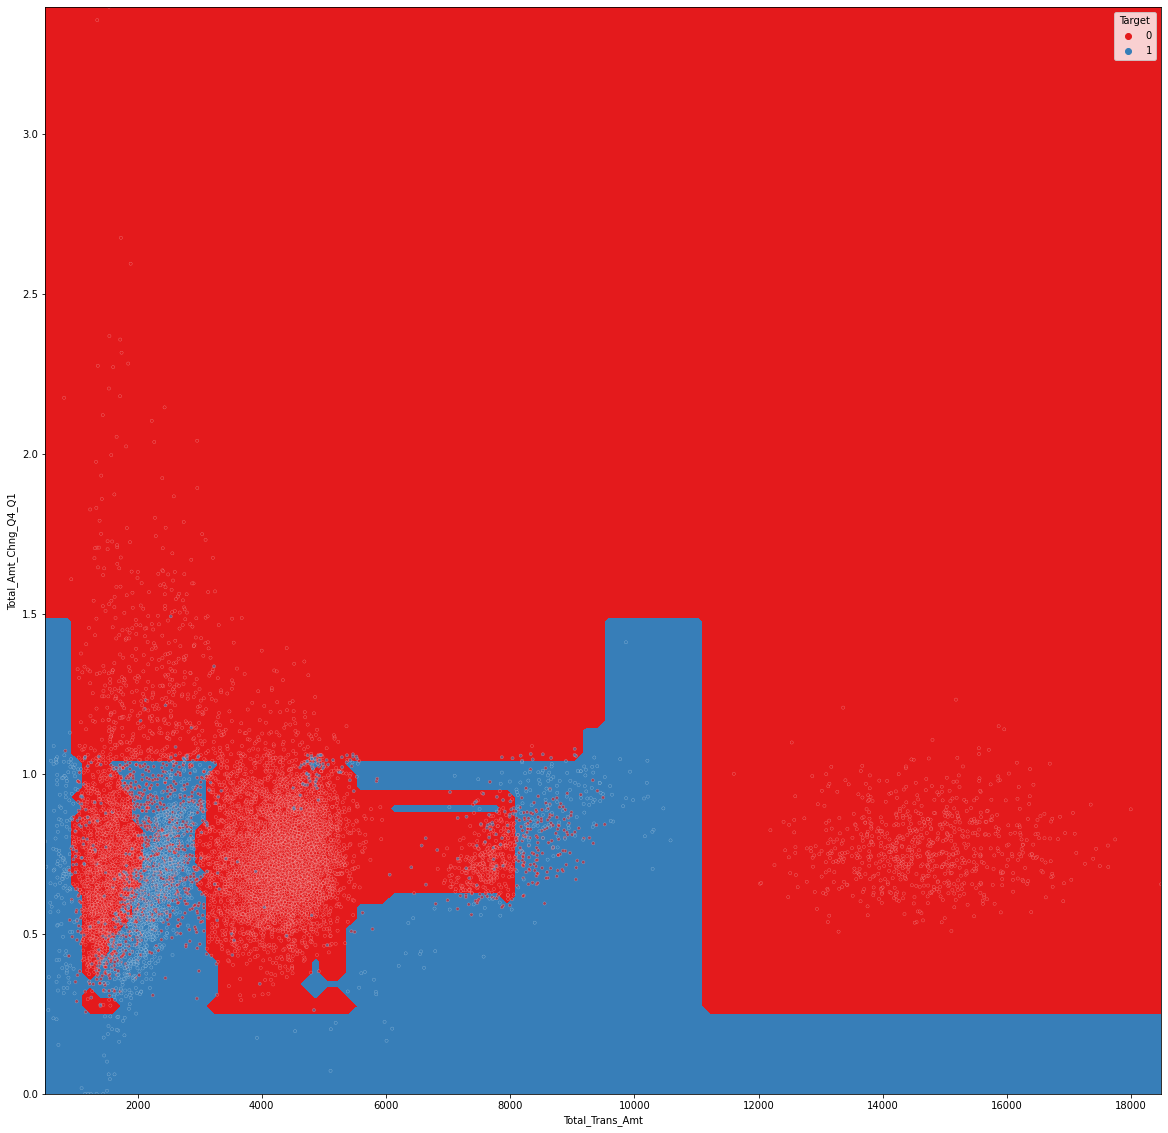

In [22]:
mesh_x, mesh_y = np.meshgrid(
    np.linspace(data.Total_Trans_Amt.min(), data.Total_Trans_Amt.max(), 100),
    np.linspace(data.Total_Amt_Chng_Q4_Q1.min(), data.Total_Amt_Chng_Q4_Q1.max(), 100),
)

mesh_data = np.hstack([mesh_x.reshape(-1, 1), mesh_y.reshape(-1, 1)])
mesh_data = pd.DataFrame(mesh_data, columns=["Total_Trans_Amt", "Total_Amt_Chng_Q4_Q1"])
# print(mesh_data)
preds = np.empty((len(mesh_data),))

X_train, X_test, y_train, y_test = train_test_split(data[["Total_Trans_Amt", "Total_Amt_Chng_Q4_Q1"]], 
                                                    data["Target"], stratify=data["Target"])
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
data_tree = ensemble.AdaBoostClassifier(n_estimators=200)
data_tree.fit(X_resampled, y_resampled)
mesh_data_pred = data_tree.predict(mesh_data)

y_pred = data_tree.predict(X_test)
print(balanced_accuracy_score(y_test, y_pred), data_tree.score(X_test, y_test))
plot_confusion_matrix(data_tree, X_test, y_test)
plt.figure(figsize=(20, 20))
sns.scatterplot(
    x="Total_Trans_Amt", y="Total_Amt_Chng_Q4_Q1", hue="Target", data=data, palette="Set1", s=10, alpha=1.0
)
plt.show()
plt.figure(figsize=(20, 20))
plt.contourf(
    mesh_x, mesh_y, mesh_data_pred.reshape(mesh_x.shape), cmap="Set1", vmin=0, vmax=7
)
plt.show()
plt.figure(figsize=(20, 20))
plt.contourf(
    mesh_x, mesh_y, mesh_data_pred.reshape(mesh_x.shape), cmap="Set1", vmin=0, vmax=7
)
sns.scatterplot(
    x="Total_Trans_Amt", y="Total_Amt_Chng_Q4_Q1", hue="Target", data=data, palette="Set1", s=10, alpha=0.6
)
plt.show()

## Classification models for multidimensional spaces

### AdaBoost

0.944058968058968 0.9494470774091627


[(0.315, 'Total_Trans_Amt'),
 (0.155, 'Total_Trans_Ct'),
 (0.12, 'Total_Amt_Chng_Q4_Q1'),
 (0.075, 'Total_Ct_Chng_Q4_Q1'),
 (0.055, 'Months_on_book'),
 (0.05, 'Credit_Limit'),
 (0.05, 'Total_Revolving_Bal'),
 (0.045, 'Customer_Age'),
 (0.035, 'Contacts_Count_12_mon'),
 (0.025, 'Total_Relationship_Count'),
 (0.025, 'Months_Inactive_12_mon'),
 (0.025, 'Avg_Open_To_Buy'),
 (0.015, 'Avg_Utilization_Ratio'),
 (0.005, 'Dependent_count'),
 (0.005, 'Flag_Male'),
 (0.0, 'Card_Category')]

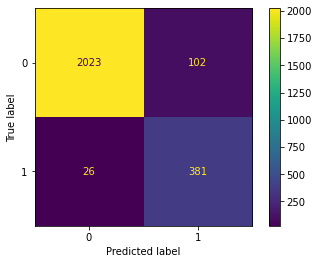

In [42]:
X = data.drop(columns=["CLIENTNUM", "Education_Level", "Marital_Status", "Income_Category", "Target"])
y = data["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
data_tree = ensemble.AdaBoostClassifier(n_estimators=200)
data_tree.fit(X_resampled, y_resampled)

y_pred = data_tree.predict(X_test)
print(balanced_accuracy_score(y_test, y_pred), data_tree.score(X_test, y_test))
plot_confusion_matrix(data_tree, X_test, y_test)
sorted(list(zip(data_tree.feature_importances_,
               data.drop(columns=["CLIENTNUM", "Education_Level", "Marital_Status", "Income_Category", "Target"]).columns)),
       key=lambda x: -x[0])

### EasyEnsembleClassifier

In [30]:
from imblearn.ensemble import EasyEnsembleClassifier
X = data.drop(columns=["CLIENTNUM", "Education_Level", "Marital_Status", "Income_Category", "Target"])
y = data["Target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)
# print(X_train, X_test, y_train, y_test)
eec = EasyEnsembleClassifier(random_state=0)
eec.fit(X_train, y_train)
y_pred = eec.predict(X_test)
print(balanced_accuracy_score(y_test, y_pred), eec.score(X_test, y_test))
plot_confusion_matrix(eec, X_test, y_test)

(0.951506865153924, 0.9419431279620853)

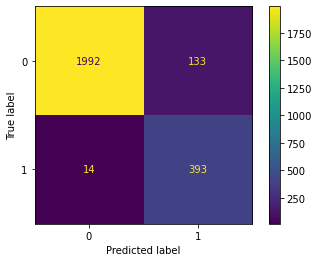

# Tests

In [21]:
len(data)

10127

In [22]:
len(data.drop_duplicates(inplace=False))

10127

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Dependent_count           10127 non-null  int64  
 3   Education_Level           10127 non-null  object 
 4   Marital_Status            10127 non-null  object 
 5   Income_Category           9015 non-null   float64
 6   Card_Category             10127 non-null  int64  
 7   Months_on_book            10127 non-null  int64  
 8   Total_Relationship_Count  10127 non-null  int64  
 9   Months_Inactive_12_mon    10127 non-null  int64  
 10  Contacts_Count_12_mon     10127 non-null  int64  
 11  Credit_Limit              10127 non-null  float64
 12  Total_Revolving_Bal       10127 non-null  int64  
 13  Avg_Open_To_Buy           10127 non-null  float64
 14  Total_